In [24]:
# Import libraries
import pandas as pd

# Load the dataset
file_path = 'Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
dataset.head()


,Object_ID,Provinsi,Tanggal,Kasus_Terkonfirmasi_Akumulatif,Penambahan_Harian_Kasus_Terkonf,Kasus_Sembuh_Akumulatif,Penambahan_Harian_Kasus_Sembuh,Kasus_Meninggal_Akumulatif,Penambahan_Harian_Kasus_Meningg,Kasus_Aktif_Akumulatif,CFR_Harian,RI_Harian,FID,ObjectId
0,1.0,Aceh,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,1.0,3572
1,2.0,Bali,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,2.0,3573
2,3.0,Banten,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,3.0,3574
3,4.0,Kepulauan Bangka Belitung,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,4.0,3575
4,5.0,Bengkulu,2020/03/02 00:00:00+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,5.0,3576


In [25]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' from previous cell contains the loaded data
# and it needs to be assigned to 'cleaned_data' or preprocessed.
cleaned_data = dataset  # If no preprocessing is needed, directly assign

# If preprocessing is required, perform it here before assigning to 'cleaned_data'
# Example:
# cleaned_data = dataset.dropna()  # To remove rows with missing values

# Seleksi fitur yang relevan
features = ['Kasus_Terkonfirmasi_Akumulatif', 'Kasus_Sembuh_Akumulatif', 'Kasus_Aktif_Akumulatif']
X = cleaned_data[features].values

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Seleksi fitur yang relevan
features = ['Kasus_Terkonfirmasi_Akumulatif', 'Kasus_Sembuh_Akumulatif', 'Kasus_Aktif_Akumulatif']
X = cleaned_data[features].values

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


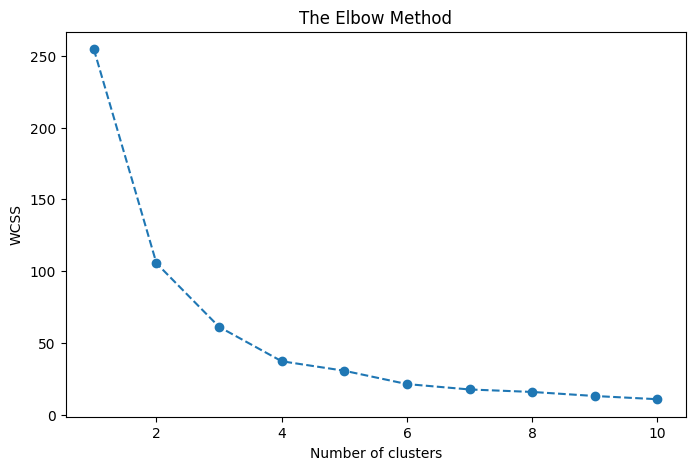

In [27]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load the dataset
file_path = 'Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
dataset.head()

# Assuming 'dataset' from previous cell contains the loaded data
# and it needs to be assigned to 'cleaned_data' or preprocessed.
cleaned_data = dataset  # If no preprocessing is needed, directly assign

# If preprocessing is required, perform it here before assigning to 'cleaned_data'
# Example:
# cleaned_data = dataset.dropna()  # To remove rows with missing values

# Seleksi fitur yang relevan
features = ['Kasus_Terkonfirmasi_Akumulatif', 'Kasus_Sembuh_Akumulatif', 'Kasus_Aktif_Akumulatif']
X = cleaned_data[features].values

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X = imputer.fit_transform(X) # Impute missing values in X

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

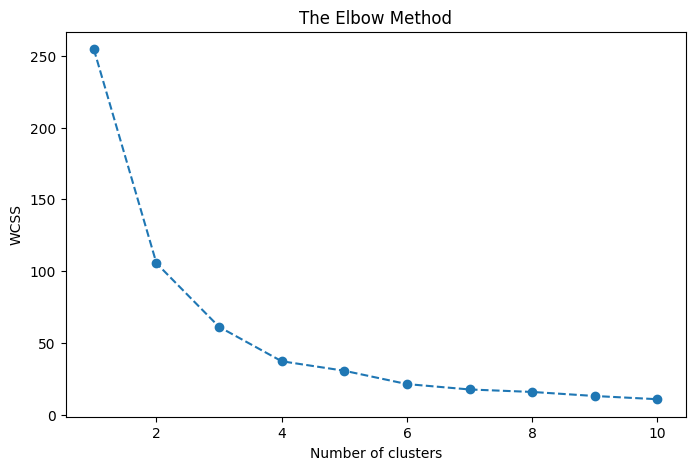

In [28]:
from sklearn.cluster import KMeans

# Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [29]:
# Menggunakan jumlah kluster optimal (misalnya, 5 dari grafik Elbow)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


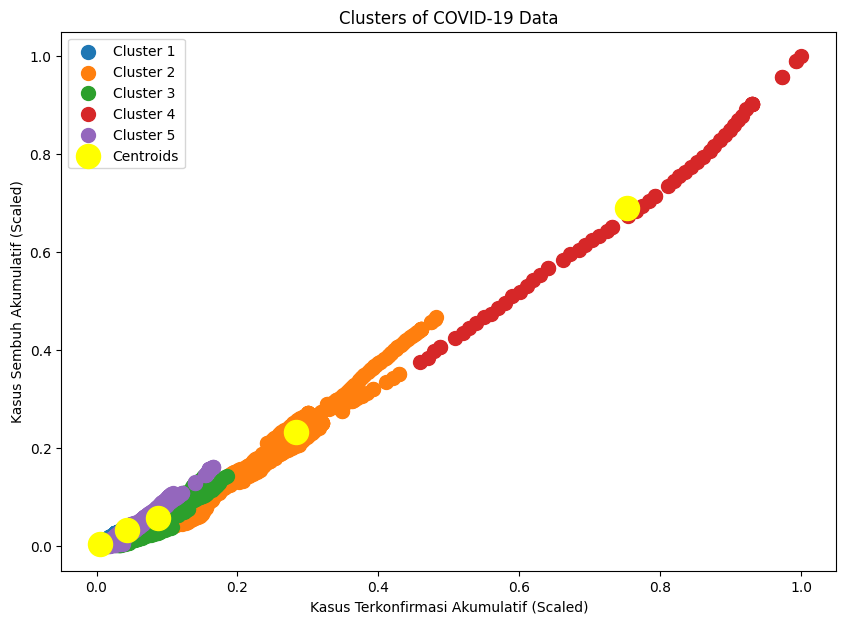

In [30]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
for i in range(optimal_clusters):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s=100, label=f'Cluster {i+1}')

# Tambahkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')
plt.title('Clusters of COVID-19 Data')
plt.xlabel('Kasus Terkonfirmasi Akumulatif (Scaled)')
plt.ylabel('Kasus Sembuh Akumulatif (Scaled)')
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, y_kmeans)
print("Davies-Bouldin Score:", db_score)


Davies-Bouldin Score: 0.7476975190184877


In [32]:
# Menambahkan kluster ke dalam data
cleaned_data['Cluster'] = y_kmeans

# Menampilkan data dengan informasi kluster
print(cleaned_data.head())


   Object_ID                   Provinsi                 Tanggal  \
0        1.0                       Aceh  2020/03/02 00:00:00+00   
1        2.0                       Bali  2020/03/02 00:00:00+00   
2        3.0                     Banten  2020/03/02 00:00:00+00   
3        4.0  Kepulauan Bangka Belitung  2020/03/02 00:00:00+00   
4        5.0                   Bengkulu  2020/03/02 00:00:00+00   

   Kasus_Terkonfirmasi_Akumulatif  Penambahan_Harian_Kasus_Terkonf  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   Kasus_Sembuh_Akumulatif  Penambahan_Harian_Kasus_Sembuh  \
0                      0.0                             0.0   
1                      0.0                          

In [33]:
# Statistik deskriptif untuk setiap kluster
for i in range(optimal_clusters):
    cluster_data = cleaned_data[cleaned_data['Cluster'] == i]
    print(f"Statistik deskriptif untuk Cluster {i+1}:")
    print(cluster_data.describe())
    print("\n")


Statistik deskriptif untuk Cluster 1:
         Object_ID  Kasus_Terkonfirmasi_Akumulatif  \
count  6341.000000                     6341.000000   
mean   3628.410818                      557.213689   
std    2384.013361                      865.525557   
min       1.000000                        0.000000   
25%    1598.000000                       22.000000   
50%    3304.000000                      191.000000   
75%    5501.000000                      694.000000   
max    8657.000000                     4712.000000   

       Penambahan_Harian_Kasus_Terkonf  Kasus_Sembuh_Akumulatif  \
count                      6341.000000              6341.000000   
mean                      -2155.379435               376.078221   
std                       10295.534370               703.958046   
min                     -110701.000000                 0.000000   
25%                           0.000000                 2.000000   
50%                           0.000000                88.000000   
75%   

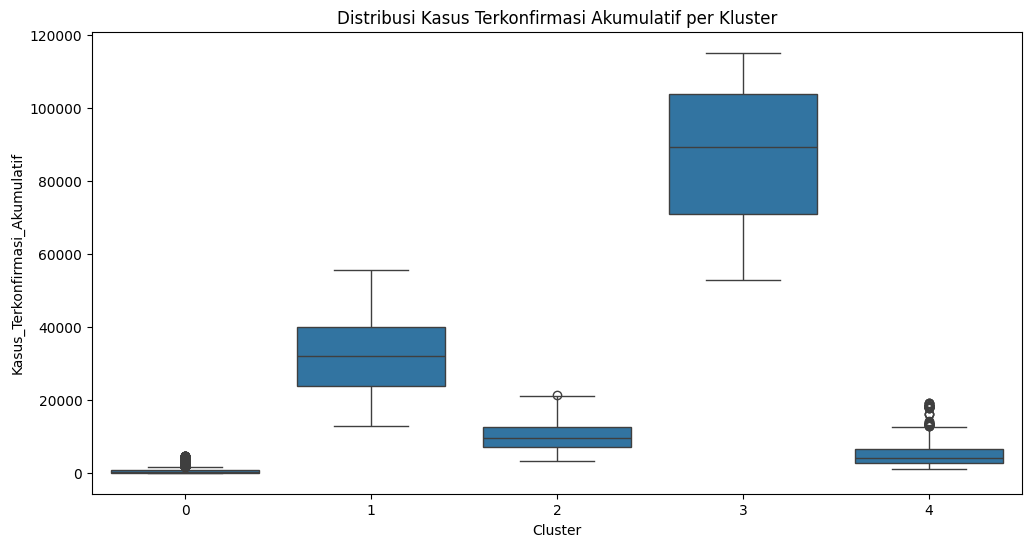

In [34]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Kasus_Terkonfirmasi_Akumulatif', data=cleaned_data)
plt.title('Distribusi Kasus Terkonfirmasi Akumulatif per Kluster')
plt.show()


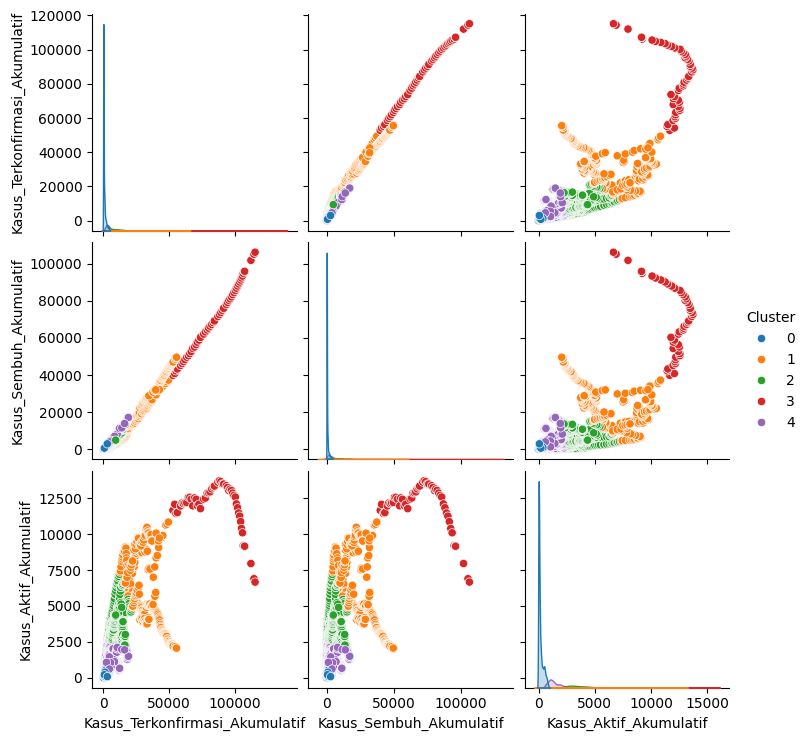

In [35]:
sns.pairplot(cleaned_data, hue='Cluster',
             vars=['Kasus_Terkonfirmasi_Akumulatif',
                   'Kasus_Sembuh_Akumulatif',
                   'Kasus_Aktif_Akumulatif'],
             palette='tab10')
plt.show()


In [36]:
# Simpan data hasil clustering ke file CSV
cleaned_data.to_csv('Hasil_Clustering_COVID19.csv', index=False)
print("Data hasil clustering telah disimpan sebagai 'Hasil_Clustering_COVID19.csv'.")


Data hasil clustering telah disimpan sebagai 'Hasil_Clustering_COVID19.csv'.


In [37]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.6722712292057585


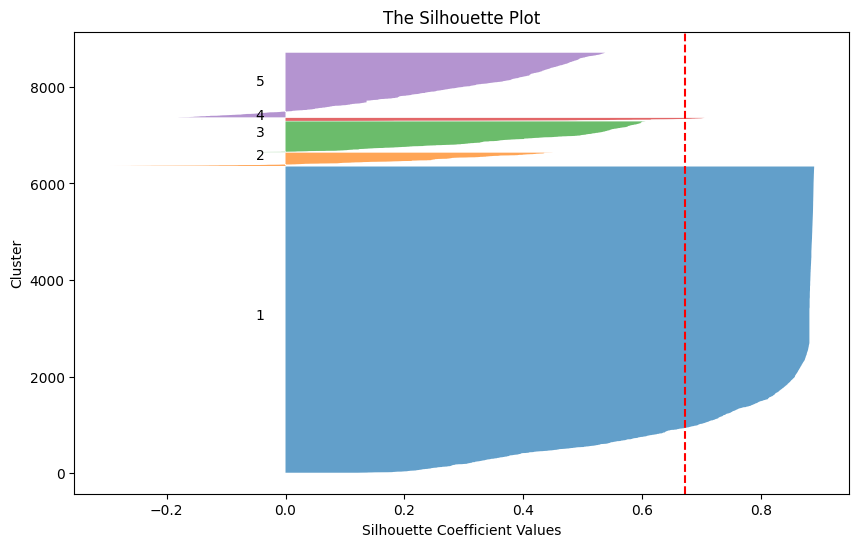

In [38]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np # Import numpy

# Hitung nilai silhouette untuk setiap titik
silhouette_vals = silhouette_samples(X_scaled, y_kmeans)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_clusters):
    cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i+1))
    y_lower = y_upper + 10

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.title("The Silhouette Plot")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.show()

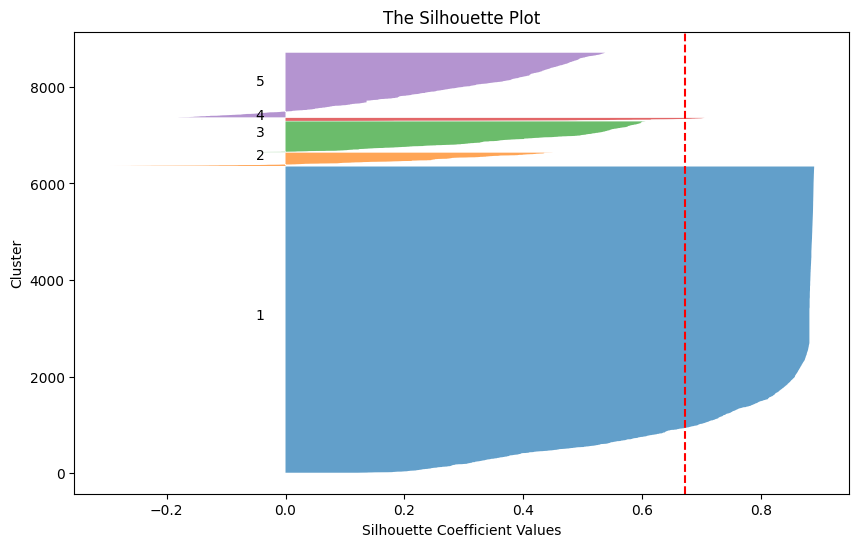

In [39]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Hitung nilai silhouette untuk setiap titik
silhouette_vals = silhouette_samples(X_scaled, y_kmeans)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_clusters):
    cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i+1))
    y_lower = y_upper + 10

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.title("The Silhouette Plot")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.show()


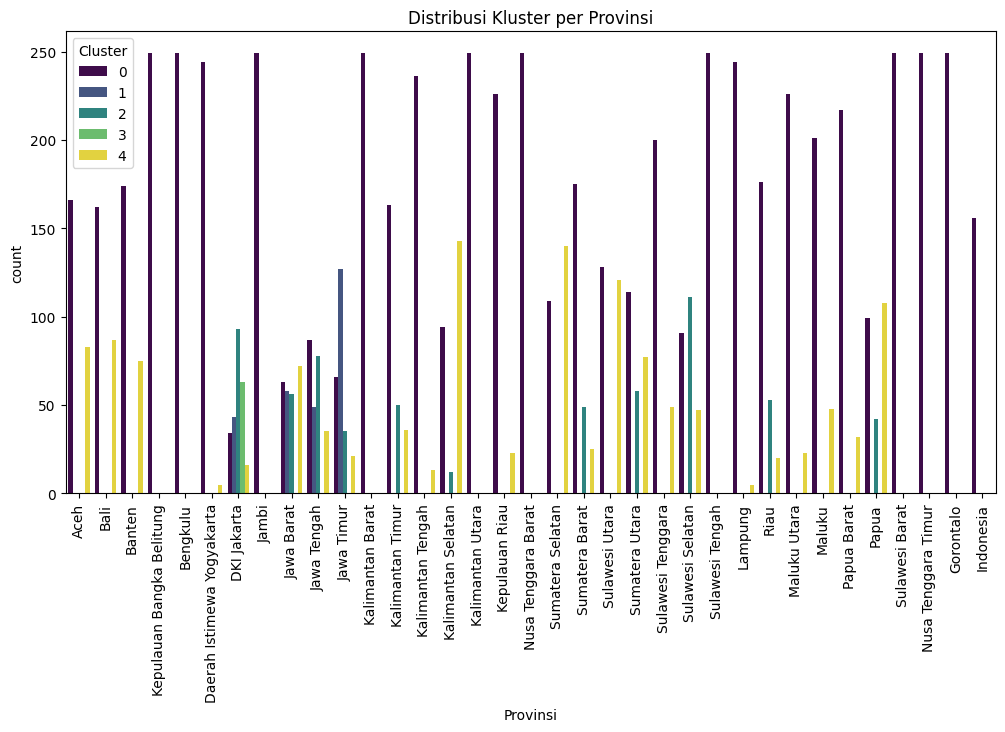

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Provinsi', hue='Cluster', data=cleaned_data, palette='viridis')
plt.title('Distribusi Kluster per Provinsi')
plt.xticks(rotation=90)
plt.show()
